# Predict car license number from licence plate image

In [1]:
import os
import random
import cv2
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import load_model
from label_codec import LabelCodec

print ("TensorFlow Version: {}".format(tf.__version__))

device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")

print(f"GPU device: {device_name}")

TensorFlow Version: 2.1.0-rc1
GPU device: /device:GPU:0


In [2]:
data_path = "D:/development/tensorflow/datasets/alpr"

IMAGE_WIDTH = 128
IMAGE_HEIGHT = 64

POOL_SIZE = 2
MAX_TEXT_LEN = 10

OPTIMIZER = "rmsprop"

OUTPUT_PATH = 'output'
MODEL_NAME = "alpr.model"

MODEL_PATH = os.path.sep.join([OUTPUT_PATH, OPTIMIZER, MODEL_NAME]) + ".h5"

In [3]:
def load_image(filepath):
    stream = open(filepath, "rb")
    bytes = bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image = cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)

    # convert image to grayscale, if it is not already a grayscale image
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image


def show_image(image):
    plt.axis("off")
    plt.title(label)
    plt.imshow(image, cmap='gray')
    plt.show()

In [4]:
tf.compat.v1.disable_eager_execution()
model = load_model(MODEL_PATH, compile=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


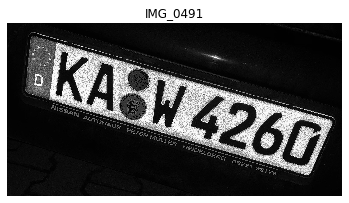

In [5]:
img_filepath = "D:/development/tensorflow/datasets/alpr/test"
img_filename = random.choice(os.listdir(img_filepath))
img_filepath = os.path.join(img_filepath, img_filename)
label = img_filename.split(".")[0]
image = load_image(img_filepath)

show_image(image)

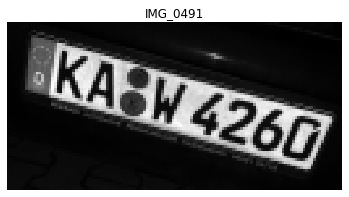

In [6]:
image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), interpolation=cv2.INTER_AREA)
image = image.astype(np.float32) / 255.

show_image(image)

Predicted:  KA-W4260
True:       IMG_0491
=> False


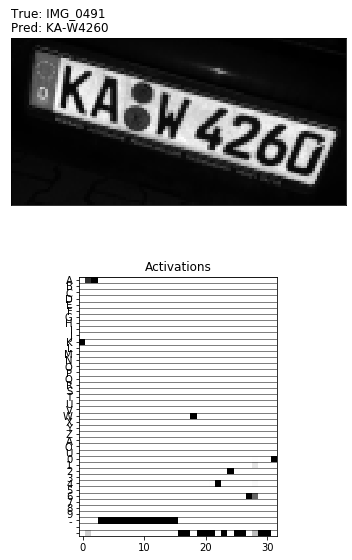

In [7]:
image = np.expand_dims(image.T, -1)

predictions = model.predict(np.asarray([image]), batch_size=1)
pred_text = LabelCodec.decode_number_from_output(predictions)

fig = plt.figure(figsize=(6, 10))
outer = gridspec.GridSpec(2, 1, wspace=10, hspace=0.1)
ax1 = plt.Subplot(fig, outer[0])
fig.add_subplot(ax1)
print('Predicted: %9s\nTrue:      %9s\n=> %s' % (pred_text, label, pred_text == label))
image = image[:, :, 0].T
ax1.set_title('True: {}\nPred: {}'.format(label, pred_text), loc='left')
ax1.imshow(image, cmap='gray')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = plt.Subplot(fig, outer[1])
fig.add_subplot(ax2)
ax2.set_title('Activations')
ax2.imshow(predictions[0].T, cmap='binary', interpolation='nearest')
ax2.set_yticks(list(range(len(LabelCodec.ALPHABET) + 1)))
ax2.set_yticklabels(LabelCodec.ALPHABET)  # + ['blank'])
ax2.grid(False)
for h in np.arange(-0.5, len(LabelCodec.ALPHABET) + 1 + 0.5, 1):
    ax2.axhline(h, linestyle='-', color='k', alpha=0.5, linewidth=1)